In [ ]:
"""
Exhaustive evaluation of the system is time complex (60 sec for a single f(X) eval (with 1% RSE)).
we have 10 input parameters. 4^10 ~ 12 days

In this model, we are automating p1 (probability of R1 ordering from D1 or D2) 
and p2 (probability of R2 ordering from D1 or D2), by changing behavior of retailer node.

The behaviour of the retailer is updated as follows;

Retailer will always order from the distributor where delivery cost and time is less if not available, 
then only select other distributor from list that minimizes the order cost

"""

<center> <h1>Inventory optimization in Supply Chain </h1> </center> 

### System Description

Consider a small supply chain, as shown in the figure 1.1 below. The supply chain contains two retailers, two distributors, and a manufacturer. 

<figure>
<img src="img/simple_supply_chain_net.png" width=60%>
<figcaption>Figure 1.1: Supply Chain Network.</figcaption>
</figure>

__Customer:__

- The arrival of customers to retailers follows a Poisson distribution with an average arrival rate of $\lambda$. A customer purchases between __1 to 10 units__ from the retailer. If requested units are unavailable, the customer will cancel his/her purchase and return.

- Note that customers can not purchase directly from the distributors.

- A customer, with some probability $p$, will choose any one of the available retailers to buy the product. 


__Retailer:__

- A retailer is directly connected to customers and facilitates product sales in the supply chain. Every retailer maintains an inventory to store product units. The inventory parameters are $(S,s)$. $S$ represents the _capacity_, and $s$ represents the _threshold_ of the inventory. The retailer will place a bulk purchase order with the distributor when the inventory level is low or below a particular threshold $s$. The retailer will only place a subsequent order if its previous order is fulfilled.

- A retailer will choose any one of the connected distributors whose delivery cost is the least to replenish its inventory. If desired units are unavailable at this distributor, the retailer will order from a distributor whose delivery cost is the next least one. If the required number of units of the product is nowhere available, then the retailer will not order. The process for replenishment is repeated on the next day.

- A retailer makes a profit of $P$ Rs behind every unit sold.

__Distributor:__

- A distributor holds massive units of products and facilitates the distribution of the product to retailers all over a small town. A distributor has its inventory to stock up on the product and provide them to retailers whenever needed. The inventory parameters are $(S,s)$ where $S$ represents capacity and $s$ represents inventory threshold. A distributor will place a bulk order with the manufacturer when the inventory levels fall below $s$. The distributor will only place a subsequent order if its previous order is fulfilled.

- A distributor charges delivery cost $C$ to the retailer whenever a delivery is made. The delivery is made in $D$ days, depending on the distance from the distributor to the retailer.

- The distributor replenishment policy: 
    1) When the inventory levels are below the threshold $s$
    2) When there are pending requests from any retailer(s), and there is no ongoing order

__Manufacturer:__

- A manufacturer makes the product. In our supply chain system, we have only one manufacturer. We assume that it has an unlimited supply of raw items to make the product. Furthermore, it will always be able to produce and deliver the desired units to distributors.

- A manufacturer charges delivery cost $C$ to the distributor whenever a delivery is made. The delivery is made in $D$ days, depending on the distance from the manufacturer to the distributor.

__Inventory:__

- A distributor or retailer can have inventory. The inventory has two parameters $(S,s)$ where $S$ represents the capacity and $s$ represents the threshold of the inventory. It has a simple replenishment policy as follows;

    - Inventory levels are monitored every day. The level is recorded at the end of the day, and if it is low (less than threshold $s$), then a bulk order to refill the inventory to level $S$ is placed.

- Furthermore, an inventory holding cost is involved, and it is $H$ Rs per day per item. If $H$ is large, it makes sense to minimize the capacity $S$ of the inventory.



### Nomenclature:

Please refer to figure 1.2.
<figure>
    <img src="img/supply_chain_net.png" width=60%>
<figcaption>Figure 1.2: Supply Chain Network.</figcaption>
</figure>

- We name the retailers, and distributors in the supply chain from top to bottom, using a subscript index $i$. Our supply chain system has two retailers, $R_1$, $R_2$, and two distributors, $D_1$ and $D_2$. 

- The probability of customers buying from retailer $R_1$ is denoted by $p$, so the probability that the customer will buy from $R_2$ is $(1-p)$.
 
- For the inventory parameters $(S,s)$, we use subscript $R$ or $D$ to represent if the inventory belongs to a retailer or a distributor. It is then followed by an index to pinpoint the retailer/distributor in the chain. We follow the same naming policy for the holding cost $H$ of the inventory. Therefore $(S_{R1}, s_{R1})$ are inventory parameters of the retailer $R_1$, and $H_{R1}$ is the associated holding cost.

- $C_{ij}$ represents the delivery cost incurred from distributor $D_i$ to retailer $R_j$. Furthermore, $D_{ij}$ represents the delay in delivery from distributor $D_i$ to retailer $R_j$. Therefore $C_{11}$ is a cost incurred for delivery from $D_1$ to $R_1$. 

- We use $M$ in the subscript if it is a delivery cost incurred from manufacturer to distributor $i$. So $C_{M1}$ represents the delivery cost from the manufacturer to $D_1$ in $D_{M1}$ days.

### Objective

- We want to maximize _Supply Chain Surplus_. 

- Notice that the profit is generated only at the retailer's end. This profit is shared (distributed) among the whole supply chain. At the same time, the supply chain cost includes intermediate delivery cost and inventory holding cost. So we calculate the surplus or net profit generated by the supply chain as follows;

$$Net~profit~(surplus) = Profit - Supply~chain~cost$$

- We want to find the optimum parameter values $(S,s)$ for retailers and distributors that maximize the net profit generated.

### Input parameter and values:

#### Fixed parameter values

- $\lambda = 20 $ 
- $p = 0.5 $ (Probability of customer buying from retailer $R_1$)

- $H_{R1} = 10$ (Inventory holding cost for $R_1$)
- $H_{R2} = 10$ 

- $D_{11} = 2$ days, $C_{11} = 5000$ 
- $D_{12} = 3$ days, $C_{12} = 6000$ 
- $D_{21} = 3$ days, $C_{21} = 7000$,
- $D_{22} = 2$ days, $C_{22} = 5500$

- $H_{D1} = 1$ (Inventory holding cost for $D_1$)
- $H_{D2} = 1$ 

- $D_{M1} = 7$ days, $C_{M1} = 500$  
- $D_{M2} = 8$ days, $C_{M2} = 500$ 

- $P = 100$ (profit per item)

<!-- 
|Parameter|Value|
| --- | --- |
|$\lambda$| 10 | 
|$p$ | 0.7 |
|$H_{R1}$|9|
|$H_{R2}$|9|
|$D_{11}$|2|
|$C_{11}$|5000|
|$D_{12}$|3|
|$C_{12}$|6000|
|$D_{21}$|3|
|$C_{21}$|7000|
|$D_{22}$|2|
|$C_{22}$|5500|
|$H_{D1}$|1|
|$H_{D2}$|1|
|$D_{M1}$|7|
|$C_{M1}$|500|
|$D_{M2}$|8|
|$C_{M2}$|500|
|$P$|100| -->

#### Design parameters

|Sr|Parameter|min|max||
| :-: | :-: | :-: | :-: | :-: |
|1|  S<sub>R1</sub> |    100  |    300  |Inventory capacity for R1| 
|2|  s<sub>R1</sub> |    100  | S<sub>R1</sub> |Inventory threshold for R1|
|3|  S<sub>R2</sub> |    100  |    300  |Inventory capacity for R2|
|4|  s<sub>R2</sub> |    100  | S<sub>R2</sub> |Inventory threshold for R2|
|5|  S<sub>D1</sub> | max{ S<sub>R1</sub>, S<sub>R2</sub> } | 600 |Inventory capacity for D1|
|6|  s<sub>D1</sub> | max{ S<sub>R1</sub>, S<sub>R2</sub> } | S<sub>D1</sub> |Inventory threshold for D1|
|7|  S<sub>D2</sub> | max{ S<sub>R1</sub>, S<sub>R2</sub> } | 600 |Inventory capacity for D2|
|8| s<sub>D2</sub> | max{ S<sub>R1</sub>, S<sub>R2</sub> } | S<sub>D2</sub> |Inventory threshold for D2|

In [1]:
# the simulation model

import simpy
import numpy as np
class SC_node:
    def __init__(self,env,name,P=0,p=None,suppliers=None,costs=None,delivery_times=None,S=None,s=None,H=None,purchase_lim=None):
        self.env = env
        self.name = name # node name
        self.P = P # profit generated by me per item sold
        self.p = p # probability distribution (suppliers)
        self.suppliers = suppliers # a list of suppliers available
        self.costs = costs # associated delivery costs per distributor
        self.delivery_times = delivery_times # associated delivery time per distributor
        self.S = S # my inventory parameter S (capacity)
        self.s = s # my inventory parameter S (threshold)
        self.H = H # my inventory holding cost
        if(self.S != None):
            #self.inventory = simpy.Container(self.env,capacity=S,init=S) # my inventory
            self.inventory = MonitoredContainer(enable_monitoring=True, env=env, init=S, capacity=S)
            # start the inventory monitor
            env.process(self.inventory_monitor(self.env))
        else:
            # if there is no inventory then it is customer or manufacturer
            self.inventory = None
        
        self.purchase_lim = purchase_lim # item purchase limits
        self.ordered = False
        
        # for recording stats
        self.inventory_levels = [] # record inventory level each day
        self.inventory_holding_cost = [] # record inventory holding cost each day
        self.delivery_cost = []
        self.total_item_sold = 0 # the total profit generated by the sales
        self.customer_returned = 0
        self.customer_arrived = 0
        if(suppliers!=None):
            self.orders_counts = np.zeros((len(suppliers),2)) # keeps count of units ordered from different suppliers
            # element at index 0 refers to D1, ele at 1 refers to D2, so on ...
            # we save [number of total units ordered, number of total orders made]
        else:
            self.orders_counts = np.zeros((1,2))
        
    # continuously monitor inventory levels (everyday)
    # if level is below threshold, then call to bulk_buy()
    def inventory_monitor(self,env):
        while True:
            yield self.env.timeout(1) # wait till end of the day
            # record inventory levels
            self.inventory_levels.append(self.inventory.level)
            print(f"({self.name}) Inventory level = {self.inventory.level} at {self.env.now}")
            self.inventory_holding_cost.append(self.inventory.level*self.H)
            # check inventory levels
            if(self.inventory.level<self.s and not self.ordered):
                self.env.process(self.order(self.env))
                self.ordered = True
            #if(self.inventory.get_queue and not self.ordered):
                # there are consumeres waiting in the queue for stocks
                # sometimes this situation will arise when inventory levels > s, but it does not
                # have sufficient units to fullfil incoming request
                #print(f"there are pending requestes to {self.name}")
                #if(self.inventory.level!=self.inventory.capacity):
                    #self.env.process(self.order(self.env))
                    #self.ordered = True
                
        # i am a distributor
        else:
            supplier = self.suppliers[dist_idx] # the supplier object
            C = self.costs[dist_idx] # associated cost
            D = self.delivery_times[dist_idx] # associated delivery delay 
            # calculate number of units to order
            num_items_to_order = self.inventory.capacity - self.inventory.level
        
            print(f"{self.name}: ordering {num_items_to_order} from {supplier.name} at {self.env.now}")
            supplier.total_item_sold += num_items_to_order
            yield supplier.inventory.get(num_items_to_order)
            self.orders_counts[dist_idx,0] += num_items_to_order
            self.orders_counts[dist_idx,1] += 1
            # record delivery cost
            self.delivery_cost.append(C)
            # wait for delivery!
            yield env.timeout(D)
            # get delivery of items, refill inventory
            print(f"{self.name}: got {num_items_to_order} from {supplier.name} at {self.env.now}")
            self.inventory.put(num_items_to_order)
    
    
    # this function is called when the inventory levels are below threshold s
    def order(self,env):
        nowhere_available = True
        dist_idx = 0
        
        if(self.costs!=None):
            # here we are just assigning indices and sorting costs
            # so 1st element of 'costs' is min, 2nd is second min and so on
            # this is done just for our convinience
            temp_costs = np.array((self.costs))
            temp_costs = np.vstack((temp_costs,np.array((range(0,len(self.costs))))))
            temp_costs = temp_costs.T
            temp_costs = temp_costs[temp_costs[:, 0].argsort()]
            temp_idx = 0
        # check if multiple suppliers are connected, choose a supplier
        if(len(self.suppliers)>1):
            if(self.inventory==None):
                dist_idx = np.random.choice(len(self.suppliers),p=self.p)
            else:
                for temp_idx in range(0,len(self.costs)):
                    # select a supplier who has least delivery cost
                    dist_idx = temp_costs[temp_idx,1]
                    num_items_to_order = self.inventory.capacity - self.inventory.level
                    if(self.suppliers[dist_idx].inventory.level < num_items_to_order):
                        print(f"{self.name}: {num_items_to_order} not available at {self.suppliers[dist_idx].name}")
                    else:
                        nowhere_available = False
                        break
        
        # calculate number of units to order
        supplier = self.suppliers[dist_idx] # the supplier object
        C = 0
        D = 0
        if(self.costs!=None):
            C = self.costs[dist_idx] # associated cost
        if(self.delivery_times!=None):
            D = self.delivery_times[dist_idx] # associated delivery delay        
        if(self.inventory!=None):
            # calculate number of units to order
            num_items_to_order = self.inventory.capacity - self.inventory.level
        else:
            # decide number of units to buy
            num_items_to_order = np.random.randint(self.purchase_lim[0],self.purchase_lim[1])
        
        # get items from your supplier
        supplier.customer_arrived += 1
        if(supplier.inventory!=None):
            if(self.inventory==None):
                print(f"{self.name}: ordering {num_items_to_order} from {supplier.name} at {self.env.now}")
                if(supplier.inventory.level >= num_items_to_order):
                    supplier.inventory.get(num_items_to_order)
                    supplier.total_item_sold += num_items_to_order
                    print(f"{self.name}: got {num_items_to_order} from {supplier.name} at {self.env.now}")
                else:
                    supplier.customer_returned += 1
            elif(not nowhere_available):
                print(f"{self.name}: ordering {num_items_to_order} from {supplier.name} at {self.env.now}")
                supplier.total_item_sold += num_items_to_order
                yield supplier.inventory.get(num_items_to_order)
                self.orders_counts[dist_idx,0] += num_items_to_order
                self.orders_counts[dist_idx,1] += 1
                # record delivery cost
                self.delivery_cost.append(C)
                # wait for delivery!
                yield env.timeout(D)
                # get delivery of items, refill inventory
                print(f"{self.name}: got {num_items_to_order} from {supplier.name} at {self.env.now}")
                self.inventory.put(num_items_to_order)

        else:
            print(f"{self.name}: ordering {num_items_to_order} from {supplier.name} at {self.env.now}")
            # record stats, which distributor/manufacturer? how many units?
            self.orders_counts[dist_idx,0] += num_items_to_order
            self.orders_counts[dist_idx,1] += 1
            # record delivery cost
            self.delivery_cost.append(C)
            # wait for delivery!
            yield env.timeout(D)
            # get delivery of items, refill inventory
            print(f"{self.name}: got {num_items_to_order} from {supplier.name} at {self.env.now}")
            self.inventory.put(num_items_to_order)
        self.ordered = False
        
class MonitoredContainer(simpy.Container):
    def __init__(self, enable_monitoring, *args, **kwargs):
        self.enable_monitoring = enable_monitoring
        super().__init__(*args, **kwargs)
        self.leveldata = []
        self.timedata = []

        self.avg_level=0 # time-avergaed inventory level
        self.last_level=super().capacity
        self.last_timestamp=0

    # called whenever the level changes, to record the current level
    def record_level(self):
        # update the time-averaged inventory level
        delta_t = self._env.now-self.last_timestamp
        if delta_t >0:
            self.avg_level = ((self.avg_level*self.last_timestamp) + (delta_t*self.last_level))/float(self._env.now)
        # record the current level
        self.last_timestamp=self._env.now
        self.last_level = self._level

        if self.enable_monitoring:
            self.leveldata.append(self._level)
            self.timedata.append(self._env.now)

    def _do_put(self, *args, **kwargs):
        r = super()._do_put(*args, **kwargs)
        self.record_level()
        return r

    def _do_get(self, *args, **kwargs):
        r = super()._do_get(*args, **kwargs)
        self.record_level()
        return r

In [3]:
import sys,os
import random
# this function implements the arrival of the customers. Function parameters are;
# env (simpy enviornment)
# lam (arrival rate lambda)
# p (probability distribution for retailers)
# returned_customers (customers who returned without getting the product)
# retailers (a list of retailers a customer can buy from)
def arrivals(env,lam,p,retailers):
    customer_number = 0
    while True:
        customer_number += 1
        # create a customer
        customer_i = SC_node(env,"customer_"+str(customer_number),suppliers=retailers,p = p,purchase_lim=[1,10])
        # customer buys items
        env.process(customer_i.order(env))
        t = random.expovariate(lambd=lam)
        yield env.timeout(t)
        del customer_i

# this function performs a single simulation run of the supply chain system, function parameters are
# lam (λ arrival rate of customers)
# D (a list of distributors. Each element in the list is a dict)
# R  (a list of retailers. Each element in the list is a dict)
# p (probability distribution for reatilers)
# profit (profit P Rupee per item sold)
# NUM_OF_DAYS (simulation runs for NUM_OF_DAYS days)
def single_sim_run(lam, D_list, R_list, p=[0.5,0.5], NUM_OF_DAYS=1000, P=100, print_log=False, print_stats=False):
    if(not D_list or not R_list):
        print("Please add distributor(s)/retailers(s)")
        exit()
    
    if(len(p)!=len(R_list)):
        print("Please check probability distribution for retailers! Assuming uniform distribution.")
        p = None

    len(R_list)
    old_stdout = sys.stdout
    if(not print_log):
        sys.stdout = open(os.devnull, 'w')

    env = simpy.Environment()
    # create a manufacturer
    M = SC_node(env,"M")
    D = [] # list to store all Distributor objects
    # create Distributor object for each distributor in the D_list
    for d in D_list:
        D.append(SC_node(env,
                        d['name'],
                        S=d['S'],
                        s=d['s'],
                        H=d['H'],
                        suppliers=[M],
                        costs = d['C'],
                        delivery_times = d['D']))
    R = [] # list to store all Distributor objects
    # create Retailer object for each distributor in the D_list
    for r in R_list:
        R.append(SC_node(env,r['name'],
                               #p = r['p'],
                               S=r['S'],
                               s=r['s'],
                               H=r['H'],
                               P=P,
                               suppliers = D,
                               costs = r['C'],
                               delivery_times = r['D']))

    env.process(arrivals(env,lam,p,retailers=R))
    env.run(NUM_OF_DAYS)

    if(print_stats):
        sys.stdout = old_stdout
    else:
        sys.stdout = open(os.devnull, 'w')

    avg_profit_per_day = 0
    avg_hold_cost_per_day = 0
    avg_del_cost_per_day = 0
    tot_customer_returned = 0
    tot_customer_arrived = 0
    timed_avg_num_items_in_inventory = 0

    #print(f"Num of customers returned = {sum(returned_customers)}")
    nodewise_stats_ls = []
    for nodes in R,D:
        for R_i in nodes:
            print(f"**** {R_i.name} ****")
            print(f"Total profit: {R_i.total_item_sold*R_i.P}, avg profit per day: {R_i.total_item_sold*R_i.P/NUM_OF_DAYS:.2f}")
            print(f"Average Inventory Holding Cost: {sum(R_i.inventory_holding_cost)/NUM_OF_DAYS:.2f}")
            for i in range(len(R_i.orders_counts)):
                print(F"\tTotal units ordered from {R_i.suppliers[i].name}: {R_i.orders_counts[i,0]}, in {R_i.orders_counts[i,1]} deliveries.")
            print(f"Total delivery cost: {sum(R_i.delivery_cost)}, avg delivery cost: {sum(R_i.delivery_cost)/NUM_OF_DAYS:.2f}")
            print(f"timed avg num of items in inventory: {R_i.inventory.avg_level:.2f}")
            print(f"frac of customers returned: {R_i.customer_returned*100/R_i.customer_arrived:.2f}%")
            print(f"net profit:{(R_i.total_item_sold*R_i.P-sum(R_i.inventory_holding_cost)-sum(R_i.delivery_cost))/NUM_OF_DAYS}")
            print("\n")
            avg_profit_per_day += R_i.total_item_sold*R_i.P/NUM_OF_DAYS
            avg_hold_cost_per_day += sum(R_i.inventory_holding_cost)/NUM_OF_DAYS
            avg_del_cost_per_day += sum(R_i.delivery_cost)/NUM_OF_DAYS
            tot_customer_returned += R_i.customer_returned
            tot_customer_arrived += R_i.customer_arrived
            timed_avg_num_items_in_inventory += R_i.inventory.avg_level

            nodewise_stats_ls.append([R_i.name,
                                      R_i.total_item_sold*R_i.P/NUM_OF_DAYS, #avg profit at R_i
                                      sum(R_i.inventory_holding_cost)/NUM_OF_DAYS, # avg holding cost
                                      sum(R_i.delivery_cost)/NUM_OF_DAYS, # avg del cost
                                      R_i.inventory.avg_level, # timed avg num of items in inventory
                                      R_i.total_item_sold/NUM_OF_DAYS, #throughput
                                      R_i.customer_returned/R_i.customer_arrived, # frac of customers returned empty handed
                                      (R_i.total_item_sold*R_i.P-sum(R_i.inventory_holding_cost)-sum(R_i.delivery_cost))/NUM_OF_DAYS])#net profit

    print(f"*** Supply Chain ***")
    print(f"Average profit generated by supply chain (per day)= {avg_profit_per_day:.2f}")
    print(f"Average inventory hold cost of supply chain (per day)= {avg_hold_cost_per_day:.2f}")
    print(f"Average delivery cost of supply chain (per day)= {avg_del_cost_per_day:.2f}")
    timed_avg_num_items_in_inventory = timed_avg_num_items_in_inventory/(len(R)+len(D))
    print(f"Average Timed-avg number of items in inventory = {timed_avg_num_items_in_inventory}")
    avg_net_profit_per_day = avg_profit_per_day - (avg_hold_cost_per_day + avg_del_cost_per_day)
    print(f"Net profit generated by supply chain = {avg_net_profit_per_day:.2f}")
    frac_customers_returned = tot_customer_returned*100/tot_customer_arrived
    print(f"Fraction number of customers returned = {frac_customers_returned:.2f}%")
    
    sys.stdout = old_stdout
    return frac_customers_returned, avg_profit_per_day, avg_hold_cost_per_day, avg_del_cost_per_day, timed_avg_num_items_in_inventory, avg_net_profit_per_day, nodewise_stats_ls

In [4]:
# setting up the SC network
distributor1 = {'name':'D1',
                'S': 500, # inventory capacity
                's': 350, # inventory threshold
                'H': 1, # inventory holding cost
                'C': [500], # delivery cost from manufacturer
                'D': [7] # delivery time
               }

distributor2 = {'name':'D2',
                'S': 500,
                's': 350,
                'H': 1,
                'C': [500],
                'D': [8]}

retailer1 = {'name':"R1",
             'S': 500,
             's': 300,
             'H': 10,
             'C':[5000,6000], # delivery cost per distributor
             'D':[2,3] # delivery time per distributor
            } 
retailer2 = {'name':"R2",
             'S': 500,
             's': 300,
             'H': 10,
             'C':[7000,5500],
             'D':[3,2]}

R_list = [retailer1,retailer2]
D_list = [distributor1,distributor2]

# this fun sets the design parameters of the supply chain
def set_design_parameters(S_R1, s_R1, S_R2, s_R2, S_D1, s_D1, S_D2, s_D2):
    global R_list, D_list

    R_list[0]['S'] = S_R1
    R_list[0]['s'] = s_R1
    
    R_list[1]['S'] = S_R2
    R_list[1]['s'] = s_R2
    
    D_list[0]['S'] = S_D1
    D_list[0]['s'] = s_D1
    
    D_list[1]['S'] = S_D2
    D_list[1]['s'] = s_D2
    
    if(s_D1 < S_R1 or s_D1 < S_R2 or s_D2 < S_R1 or s_D2 < S_R2):
        print("Distributor inventory threshold level cannot be less than retailers' capacity!")

In [9]:
# test run
# examining the simulation log 
lambda_arr_rate = 20
p = [0.5,0.5] 
Profit = 100
num_days = 360
num_sims = 60
set_design_parameters(S_R1=450, s_R1=100, S_R2=450, s_R2=100, S_D1=750, s_D1=350, S_D2=750, s_D2=350)
frac_cust_ret, avg_p, avg_hold_c, avg_del_c, timed_avg_inv, avg_net_p, nwise_stat = single_sim_run(lambda_arr_rate, D_list, R_list,p=p,NUM_OF_DAYS=num_days, P=Profit,print_log=True,print_stats=True)

Distributor inventory threshold level cannot be less than retailers' capacity!
customer_1: ordering 2 from R2 at 0
customer_1: got 2 from R2 at 0
customer_2: ordering 1 from R2 at 0.15680350727486908
customer_2: got 1 from R2 at 0.15680350727486908
customer_3: ordering 1 from R1 at 0.25702888725701
customer_3: got 1 from R1 at 0.25702888725701
customer_4: ordering 8 from R2 at 0.3222894042556579
customer_4: got 8 from R2 at 0.3222894042556579
customer_5: ordering 9 from R1 at 0.3229524782246671
customer_5: got 9 from R1 at 0.3229524782246671
customer_6: ordering 9 from R2 at 0.32720990500834274
customer_6: got 9 from R2 at 0.32720990500834274
customer_7: ordering 7 from R2 at 0.36560054878213555
customer_7: got 7 from R2 at 0.36560054878213555
customer_8: ordering 2 from R2 at 0.3708137125242576
customer_8: got 2 from R2 at 0.3708137125242576
customer_9: ordering 3 from R1 at 0.5376572057068256
customer_9: got 3 from R1 at 0.5376572057068256
customer_10: ordering 9 from R2 at 0.5615263

customer_4361: ordering 8 from R2 at 217.89782904661706
customer_4362: ordering 5 from R2 at 217.95136073251206
customer_4363: ordering 1 from R1 at 217.98905429965282
customer_4364: ordering 7 from R1 at 217.99990345180356
(D1) Inventory level = 394 at 218
(D2) Inventory level = 395 at 218
(R1) Inventory level = 0 at 218
R1: 450 not available at D1
R1: 450 not available at D2
(R2) Inventory level = 0 at 218
R2: 450 not available at D2
R2: 450 not available at D1
customer_4365: ordering 4 from R2 at 218.03851539719403
customer_4366: ordering 7 from R1 at 218.09460167238765
customer_4367: ordering 5 from R1 at 218.10958626620535
customer_4368: ordering 9 from R2 at 218.11741761963722
customer_4369: ordering 8 from R2 at 218.1852400255555
customer_4370: ordering 8 from R1 at 218.19373693188035
customer_4371: ordering 1 from R1 at 218.24769825213292
customer_4372: ordering 5 from R2 at 218.25182467392972
customer_4373: ordering 2 from R1 at 218.29389018017528
customer_4374: ordering 4 fro

In [4]:
# test run for N simulations
# and exe time
import time
lambda_arr_rate = 20
p = [0.5,0.5]
Profit = 100
num_days = 30
num_sims = 50

p_net = []
start_time = time.time()
for i in range(0,num_sims):
    #set_design_parameters(S_R1=S_R, s_R1=s_R, p1=0.5, S_R2=S_R, s_R2=s_R, p2=0.5, S_D1=S_D, s_D1=s_D, S_D2=S_D, s_D2=s_D)
    frac_cust_ret, avg_p, avg_hold_c, avg_del_c, timed_avg_inv, avg_net_p, nwise_stat = single_sim_run(lambda_arr_rate, D_list, R_list,p=p,NUM_OF_DAYS=num_days, P=Profit,print_log=False,print_stats=False)
    p_net.append(avg_net_p)
exe_time = time.time() - start_time
mean_pnet = sum(p_net)/num_sims
SE_pnet = np.std(p_net)/np.sqrt(num_sims)
print(f"E[p_net] = {mean_pnet}, error = {SE_pnet}, RSE = {SE_pnet*100/mean_pnet}, exe_time = {exe_time}")

E[p_net] = 1668.9493333333332, error = 62.88824050640239, RSE = 3.7681335946129617, exe_time = 1.7480993270874023


In [4]:
# estimate the number of simulations to do
import matplotlib.pyplot as plt
import time

lambda_arr_rate = 20
p = [0.5,0.5]
Profit = 100
num_days = 1000

NUM_SIM = [50,100,200,300,400]
NUM_of_DAYS = [100,200,500,1000,1500]

record_stats_means = []
time_arr = []
print("num_days,  num_sim,  frac cust ret,  profit,  holding_cost,  delivery_cost,  net_profit,  timed_avg_inv_lv,  rel_err,  exe_time")

for j in NUM_of_DAYS:
    for i in NUM_SIM:
        record_stats = []
        start_time = time.time()
        for h in range(i):
            frac_cust_ret, avg_p, avg_hold_c, avg_del_c, timed_avg_inv, avg_net_p, nwise_stat = single_sim_run(lambda_arr_rate, D_list, R_list, p=p, NUM_OF_DAYS=j, P=Profit)
            record_stats.append([j,i,frac_cust_ret, avg_p, avg_hold_c, avg_del_c, avg_net_p, timed_avg_inv])
        time_arr.append(time.time()-start_time)
        record_stats = np.array((record_stats))
        
        error = np.std(record_stats[:,6])/np.sqrt(i)
        rel_std_err = np.abs(error*100/np.mean(record_stats[:,6]))
        
        record_stats_means.append([*np.mean(record_stats,axis=0),rel_std_err,time_arr[-1]])
        print(record_stats_means[-1])
        del record_stats


num_days	num_sim	frac cust ret	profit	holding_cost	delivery_cost	net_profit	rel_err	timed_avg_inv_lv
[100.0, 100.0, 34.28413344169152, 3022.43, 2558.6119000000003, 1011.85, -548.0319000000001, 168.64558473697812, 6.074203488935947, 6.015213251113892]
[100.0, 200.0, 36.70799344594159, 2898.135, 2465.0408500000003, 963.15, -530.0558500000001, 168.8481118402792, 4.638013940299392, 11.967317581176758]
[100.0, 300.0, 38.00522042448983, 2839.3766666666666, 2399.459966666665, 924.25, -484.33329999999995, 169.332247973415, 3.67945722545723, 17.93488073348999]
[100.0, 400.0, 36.81304455728221, 2913.965, 2464.360875000001, 954.3625, -504.75837499999943, 168.62476596720404, 3.134631309404065, 23.915494680404663]
[200.0, 100.0, 60.59944039961004, 1468.155, 1374.8772500000007, 460.4, -367.12225, 166.13866556622503, 4.633193120938391, 11.387641429901123]
[200.0, 200.0, 60.75662198944097, 1479.515, 1352.51615, 471.075, -344.07615, 168.85758763072877, 2.9657998789987325, 22.940813779830933]
[200.0, 30

In [5]:
# execution time (computational effort) vs relative standard error
import time
# parameters
lambda_arr_rate = 20
p = [0.5,0.5]
Profit = 100
num_days = 1000
num_sims_exe_tim = 100

#set_design_parameters(S_R1=S_R, s_R1=s_R, p1=0.5, S_R2=S_R, s_R2=s_R, p2=0.5, S_D1=S_D, s_D1=s_D, S_D2=S_D, s_D2=s_D)

NUM_DAYS = [100,200,500,700]
#exe time estimation for a single simulation run fro num_days in 1000, 2000, 3000
tim_stats = []
print(f"num_days,   exe time,   std(exe_tim),   error(exe_tim),   rel_std_err%(exe_tim)")
for num_days in NUM_DAYS:
    tim_arr = []
    tim_arr.clear()
    for i in range(0,num_sims_exe_tim): # avaraging the execution time found over 100 runs, just to get accurate enough measure
        start_time = time.time()
        frac_cust_ret, avg_profit, avg_hold_c, avg_del_c, timed_avg_in, avg_net_p, nwise_stat = single_sim_run(lambda_arr_rate, D_list, R_list, p=p, NUM_OF_DAYS=num_days, P=Profit)
        tim_arr.append(time.time()-start_time)

    mean_tim = sum(tim_arr)/len(tim_arr)
    std_tim = np.std(tim_arr)
    err = std_tim/np.sqrt(num_sims_exe_tim)
    rel_err = err*100/mean_tim
    tim_stats.append([num_days,mean_tim,std_tim,err,rel_err])
    print(f"{num_days},   {mean_tim},   {std_tim},   {err},   {rel_err:.2f}%")


num_days,   exe time,   std(exe_tim),   error(exe_tim),   rel_std_err%(exe_tim)
100,   0.11152623891830445,   0.007155192757548269,   0.0007155192757548269,   0.64%
200,   0.22394672870635987,   0.007058302246311859,   0.0007058302246311859,   0.32%
500,   0.555843186378479,   0.010618588111636821,   0.0010618588111636822,   0.19%
700,   0.7906938147544861,   0.01862794100324451,   0.001862794100324451,   0.24%


In [7]:
import matplotlib.pyplot as plt
#print("num_days,mean_tim,std_tim,err,rel_err")
#print(tim_stats)
 
# this is the table obtained from above cell (# estimate the number of simulations to do)
# I have copy pasted it here so to avoid running above cell
# num_days, num_sims, cust_ret, profit, hold_c, del_c, net_profit, rel_std_err, exe_tim
record_stats_means = np.array(([[100.0, 100.0, 34.28413344169152, 3022.43, 2558.6119000000003, 1011.85, -548.0319000000001, 168.64558473697812, 6.074203488935947, 6.015213251113892],
    [100.0, 200.0, 36.70799344594159, 2898.135, 2465.0408500000003, 963.15, -530.0558500000001, 168.8481118402792, 4.638013940299392, 11.967317581176758],
    [100.0, 300.0, 38.00522042448983, 2839.3766666666666, 2399.459966666665, 924.25, -484.33329999999995, 169.332247973415, 3.67945722545723, 17.93488073348999],
    [100.0, 400.0, 36.81304455728221, 2913.965, 2464.360875000001, 954.3625, -504.75837499999943, 168.62476596720404, 3.134631309404065, 23.915494680404663],
    [200.0, 100.0, 60.59944039961004, 1468.155, 1374.8772500000007, 460.4, -367.12225, 166.13866556622503, 4.633193120938391, 11.387641429901123],
    [200.0, 200.0, 60.75662198944097, 1479.515, 1352.51615, 471.075, -344.07615, 168.85758763072877, 2.9657998789987325, 22.940813779830933],
    [200.0, 300.0, 60.30441192101202, 1497.73, 1372.6965666666672, 479.43333333333334, -354.39989999999983, 168.19337424703082, 2.8558658804770554, 34.184218883514404],
    [200.0, 400.0, 59.87782403787342, 1525.93, 1393.4580749999993, 493.475, -361.003075, 166.8768739165386, 2.4229534480485664, 45.66769814491272],
    [500.0, 100.0, 73.40078238176817, 664.5740000000001, 732.3782800000001, 217.61, -285.41428, 163.76872681737171, 2.8823830132431234, 27.477328538894653],
    [500.0, 200.0, 74.37048512601922, 599.9430000000002, 685.7203, 189.36, -275.1373, 165.64108405230428, 1.584501502664938, 55.31844997406006],
    [500.0, 300.0, 74.39750329208114, 599.6679999999997, 683.0631666666665, 190.22333333333333, -273.61849999999987, 166.35599198897592, 1.3285081252901643, 82.95610737800598],
    [500.0, 400.0, 74.0011106406003, 625.3209999999998, 702.3702100000004, 202.7675, -279.81670999999983, 165.33874913482887, 1.2821451167804596, 109.337162733078],
    [1000.0, 100.0, 78.56059747173329, 321.72099999999995, 466.10918999999996, 106.53, -250.91819000000007, 162.66333148865561, 1.6059497825088127, 54.52098822593689],
    [1000.0, 200.0, 78.88610235341119, 301.072, 453.4984300000002, 95.9825, -248.40892999999997, 166.64920921832163, 1.0690554502227443, 108.66485381126404],
    [1000.0, 300.0, 78.80798168179824, 306.2643333333336, 456.2116033333335, 98.34666666666666, -248.2939366666664, 165.2103380970704, 0.7890846839653346, 162.69415760040283],
    [1000.0, 400.0, 78.91335735416018, 298.0350000000002, 450.6358474999998, 94.86125, -247.46209749999994, 166.2246366839303, 0.677141464911689, 215.92240595817566],
    [1500.0, 100.0, 80.19704709400365, 212.9713333333333, 380.68996000000016, 68.68666666666668, -236.40529333333333, 163.39846848158643, 1.120412108620163, 80.34309458732605],
    [1500.0, 200.0, 80.39370963279072, 199.57199999999997, 373.4169033333336, 63.96666666666666, -237.8115700000001, 168.77706546046068, 0.7829055277362809, 161.65208911895752],
    [1500.0, 300.0, 80.22982335889171, 210.5606666666667, 379.58235111111105, 68.23777777777778, -237.2594622222221, 163.58172900063593, 0.6267596576358, 241.59226870536804],
    [1500.0, 400.0, 80.36792098653737, 201.49933333333334, 377.5742083333333, 64.48, -240.55487499999978, 166.6876851826611, 0.5180820995109044, 325.44591069221497]]))
tim_stats = np.array((tim_stats))

se_rse_exe_tim = []
for i in record_stats_means:
    temp = tim_stats[tim_stats[:,0]==i[0],1] # get exe time from tim_stats for value of num_days in i
    if(temp.size>0):
        exe_tim = temp[0]*i[1]
        se = i[8]*i[7]/100
        rse = i[8]
        # num_days, num_sims, SE, RSE, exe_tim
        se_rse_exe_tim.append([i[0],i[1],se,rse,exe_tim])
se_rse_exe_tim = np.array((se_rse_exe_tim))

print("\nnum_days,   num_sims,   SE(P_net),   RSE(%)(P_net),   exe_time\n")
for r in se_rse_exe_tim:
    for s in r:
        print(s,end=",   ")
    print()


num_days,   num_sims,   SE(P_net),   RSE(%)(P_net),   exe_time

100.0,   100.0,   10.243875992029952,   6.074203488935947,   6.412515163421631,   
100.0,   200.0,   7.8311989650844565,   4.638013940299392,   12.825030326843262,   
100.0,   300.0,   6.230507633086972,   3.67945722545723,   19.237545490264893,   
100.0,   400.0,   5.285764709417308,   3.134631309404065,   25.650060653686523,   
200.0,   100.0,   7.6975252242331775,   4.633193120938391,   12.737375259399414,   
200.0,   200.0,   5.007978129632333,   2.9657998789987325,   25.474750518798828,   
200.0,   300.0,   4.803377188344036,   2.8558658804770554,   38.21212577819824,   
200.0,   400.0,   4.043348970556432,   2.4229534480485664,   50.949501037597656,   
500.0,   100.0,   4.720441962788458,   2.8823830132431234,   31.671919822692875,   
500.0,   200.0,   2.6245854658392545,   1.584501502664938,   63.34383964538575,   
500.0,   300.0,   2.2100528704805997,   1.3285081252901643,   95.01575946807861,   
500.0,   400.0,  

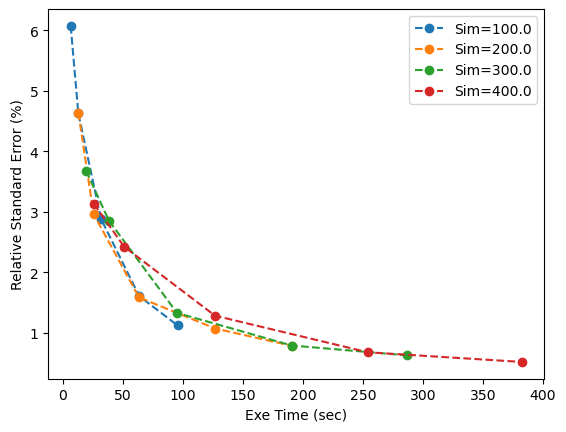

In [8]:
num_sims_arr = np.unique(se_rse_exe_tim[:,1])
fig, ax = plt.subplots()
for d in num_sims_arr:
    temp = se_rse_exe_tim[se_rse_exe_tim[:,1]==d,:]
    ax.plot(temp[:,4],temp[:,3],label="Sim="+str(temp[0,1]),marker="o",linestyle="--")
    #for i in range(0,temp.shape[0]):
    #    ax.annotate(str(temp[i,0]), (temp[i,4],temp[i,3]))
plt.ylabel("Relative Standard Error (%)")
plt.xlabel("Exe Time (sec)")
plt.legend()
plt.show()

In [4]:
# this is a validation test of the model
# we vary S_R1 and s_R1, keeping rest of the parameter values constant
# we observe the trend of P_net for different values of S_R1 and s_R1

import matplotlib.pyplot as plt
NUM_SIM = 200
NUM_DAYS = 100
record_stats = []   
for SR1 in range(250,400,25):
    for sR1 in np.arange(10,250,10):
        # set design parameters
        set_design_parameters(S_R1=SR1, s_R1=sR1, p1=0.6, S_R2=300, s_R2=250, p2=0.45, S_D1=400, s_D1=300, S_D2=400, s_D2=300)
        temp = []
        for j in range(NUM_SIM):
            frac_cust_ret, avg_profit, avg_hold_cost, avg_del_cost, timed_avg_in, avg_net_profit, nwise_stats = single_sim_run(10, D_list, R_list, p=[0.25,0.75], NUM_OF_DAYS=1000, P=100)
            temp.append([frac_cust_ret, avg_profit, avg_hold_cost, avg_del_cost, avg_net_profit])
        record_stats.append([SR1,sR1,*np.mean(temp,axis=0)])
        del temp
        print(record_stats[-1])

record_stats = np.array((record_stats))

[250, 10, 6.154111994366746, 4651.875500000002, 3148.8260199999995, 2482.1625, -979.1130199999998]
[250, 20, 5.604971477574684, 4674.997500000001, 3163.949260000002, 2487.2825, -976.2342600000004]
[250, 30, 5.330975960673715, 4702.558, 3168.609934999999, 2493.2975, -959.3494350000002]
[250, 40, 4.882334180428908, 4724.1895, 3183.3556350000003, 2501.2225, -960.3886349999999]
[250, 50, 4.7984872910980965, 4734.999500000001, 3202.8167850000004, 2505.7475, -973.5647849999997]
[250, 60, 4.613488950160034, 4743.723999999996, 3239.3017849999997, 2522.5375, -1018.1152850000003]
[250, 70, 4.582999885790121, 4747.6545, 3273.315705000001, 2530.8725, -1056.5337049999998]
[250, 80, 4.4846907246872885, 4749.354499999999, 3320.9982550000013, 2551.6025, -1123.2462549999996]
[250, 90, 4.518290743028633, 4758.651000000002, 3364.680840000001, 2567.57, -1173.5998400000003]
[250, 100, 4.474593321099806, 4762.5965000000015, 3416.885575000002, 2596.5525, -1250.8415750000004]
[250, 110, 4.44685845128928, 4757

[325, 80, 5.001855839097167, 4722.690500000002, 3607.5884299999993, 2477.56, -1362.4579299999996]
Distributor inventory threshold level cannot be less than retailers' capacity!
[325, 90, 4.671992065598201, 4735.5515000000005, 3671.63676, 2484.4375, -1420.52276]
Distributor inventory threshold level cannot be less than retailers' capacity!
[325, 100, 4.616185444128301, 4742.027000000001, 3720.8719299999975, 2494.4275, -1473.27243]
Distributor inventory threshold level cannot be less than retailers' capacity!
[325, 110, 4.550031224382946, 4753.159, 3777.61974, 2500.82, -1525.280739999999]
Distributor inventory threshold level cannot be less than retailers' capacity!
[325, 120, 4.4803134066919315, 4751.5250000000015, 3839.7973700000025, 2510.165, -1598.4373699999999]
Distributor inventory threshold level cannot be less than retailers' capacity!
[325, 130, 4.4961188158849374, 4757.477499999999, 3890.15546, 2517.21, -1649.8879599999998]
Distributor inventory threshold level cannot be less t

[375, 80, 10.67867286090181, 4410.078500000002, 3289.3480199999995, 2468.645, -1347.9145200000003]
Distributor inventory threshold level cannot be less than retailers' capacity!
[375, 90, 9.393564429197376, 4476.400000000005, 3439.198365, 2460.8925, -1423.690865]
Distributor inventory threshold level cannot be less than retailers' capacity!
[375, 100, 9.046613286805677, 4503.919999999999, 3492.5136750000006, 2469.4375, -1458.031175000001]
Distributor inventory threshold level cannot be less than retailers' capacity!
[375, 110, 8.056372342289475, 4555.166, 3615.1679899999995, 2470.75, -1530.7519900000002]
Distributor inventory threshold level cannot be less than retailers' capacity!
[375, 120, 7.238624439385789, 4598.538499999999, 3723.4973449999984, 2476.9225, -1601.8813450000002]
Distributor inventory threshold level cannot be less than retailers' capacity!
[375, 130, 6.6191886337772425, 4633.576999999995, 3847.811385000002, 2477.465, -1691.6993850000008]
Distributor inventory thresho

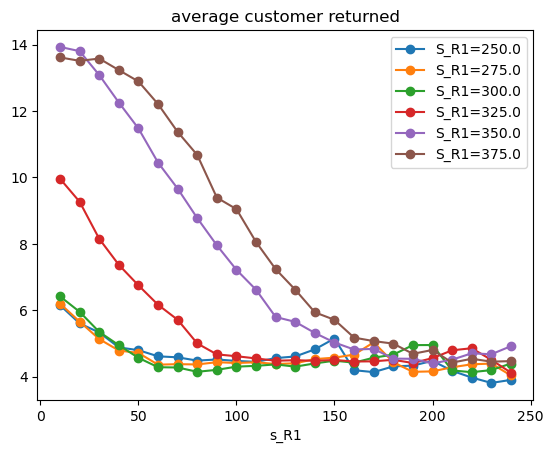

In [5]:
X = np.unique(record_stats[:,0], return_index=False)
plt.figure()
for x in X:
    temp = record_stats[record_stats[:,0]==x]
    temp = temp[temp[:, 1].argsort()]
    plt.plot(temp[:,1],temp[:,2],marker='o',linestyle='-',label = "S_R1="+str(x))
    del temp
plt.xlabel("s_R1")
plt.title("average customer returned")
plt.legend()
plt.show()

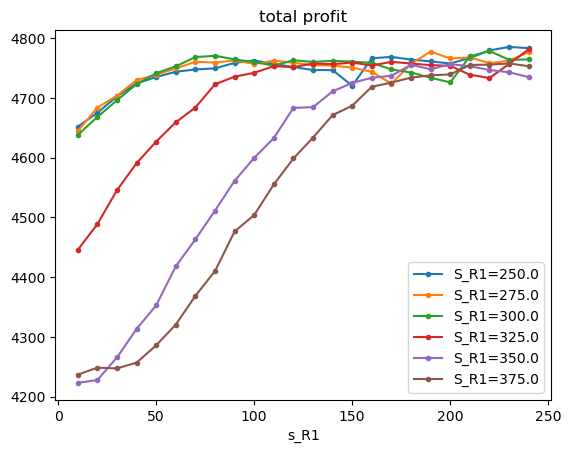

In [6]:
plt.figure()
for x in X:
    temp = record_stats[record_stats[:,0]==x]
    temp = temp[temp[:, 1].argsort()]
    plt.plot(temp[:,1],temp[:,3],marker='.',linestyle='-',label = "S_R1="+str(x))
    del temp
plt.xlabel("s_R1")
plt.title("total profit")
plt.legend()
plt.show()

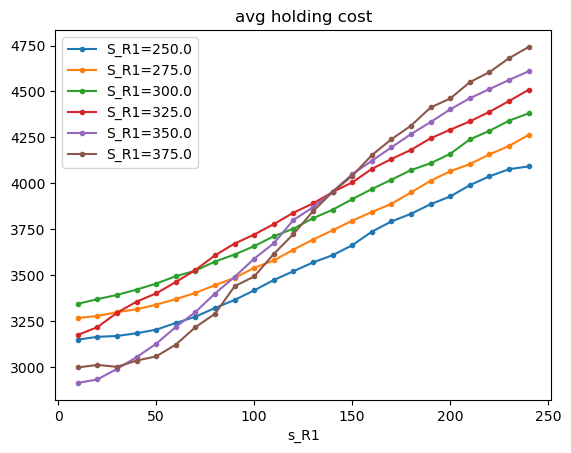

In [7]:
plt.figure()
for x in X:
    temp = record_stats[record_stats[:,0]==x]
    temp = temp[temp[:, 1].argsort()]
    plt.plot(temp[:,1],temp[:,4],marker='.',linestyle='-',label = "S_R1="+str(x))
    del temp
plt.xlabel("s_R1")
plt.title("avg holding cost")
plt.legend()
plt.show()

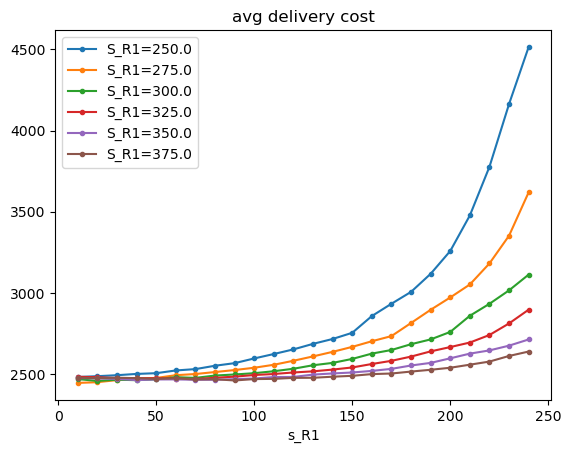

In [8]:
plt.figure()
for x in X:
    temp = record_stats[record_stats[:,0]==x]
    temp = temp[temp[:, 1].argsort()]
    plt.plot(temp[:,1],temp[:,5],marker='.',linestyle='-',label = "S_R1="+str(x))
    del temp
plt.xlabel("s_R1")
plt.title("avg delivery cost")
plt.legend()
plt.show()

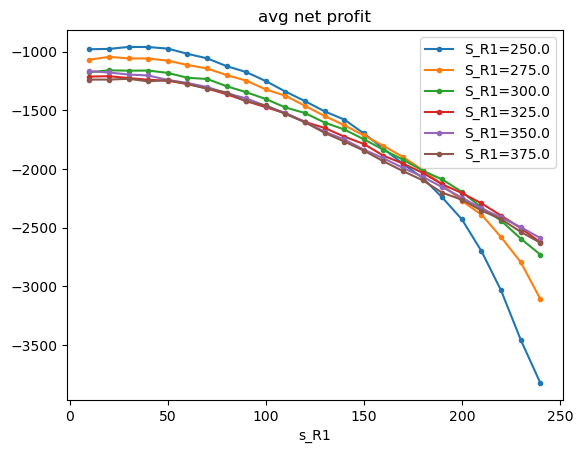

In [9]:
plt.figure()
for x in X:
    temp = record_stats[record_stats[:,0]==x]
    temp = temp[temp[:, 1].argsort()]
    plt.plot(temp[:,1],temp[:,6],marker='.',linestyle='-',label = "S_R1="+str(x))
    del temp
plt.xlabel("s_R1")
plt.title("avg net profit")
plt.legend()
plt.show()

<IPython.core.display.Javascript object>


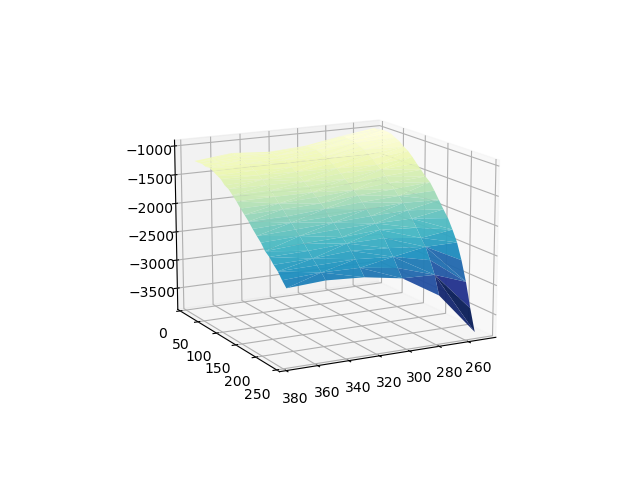

In [10]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook
record_stats = np.array((record_stats))

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.plot_trisurf(record_stats[:,0],record_stats[:,1],record_stats[:,6],linewidth=0.2, antialiased=True, alpha=0.95, cmap=plt.cm.YlGnBu_r)
plt.show()

## Exhaustive Evaluation

Exhaustive eval for above suply chain model
Discussion: 
- We decided to run exhaustive evaluation for a symmetric model.
  - that is $S_{D1} = S_{D2} = S_D$ (bounds = 10 to 400)
  - $s_{D1} = s_{D2} = s_D$ (10 to $S_D$)
  - $S_{R1} = S_{R2} = S_D$ (10 to $s_D$)
  - $s_{R1} = s_{R2} = s_D$ (10 to $S_R$)
  - $p_1 = p_2 = 0.5$
The following code was already ran and all stats for given input settings are saved in the below-mentioned file

In [4]:
import sys
sys.path.append("src")
import SupplyChainModelv2 as model
import numpy as np
import pandas as pd
import os

distributor1 = {'name':'D1',
                'S': 500, # inventory capacity
                's': 350, # inventory threshold
                'H': 1, # inventory holding cost
                'C': [500], # delivery cost from manufacturer
                'D': [7] # delivery time
               }

distributor2 = {'name':'D2',
                'S': 500,
                's': 350,
                'H': 1,
                'C': [500],
                'D': [8]}

retailer1 = {'name':"R1",
             'S': 500,
             's': 300,
             'H': 10,
             'C':[5000,6000], # delivery cost per distributor
             'D':[2,3] # delivery time per distributor
            } 
retailer2 = {'name':"R2",
             'S': 500,
             's': 300,
             'H': 10,
             'C':[7000,5500],
             'D':[3,2]}

R_list = [retailer1,retailer2]
D_list = [distributor1,distributor2]

# this fun sets the design parameters of the supply chain

def N_sim_runs(D_list,R_list,
               S_D1, s_D1, S_D2, s_D2, S_R1, s_R1, S_R2, s_R2,
               arr_rate,p,NUM_OF_DAYS,Profit,
               NUM_OF_SIMS):
    
    R_list[0]['S'] = S_R1
    R_list[0]['s'] = s_R1
    
    R_list[1]['S'] = S_R2
    R_list[1]['s'] = s_R2
    
    D_list[0]['S'] = S_D1
    D_list[0]['s'] = s_D1
    
    D_list[1]['S'] = S_D2
    D_list[1]['s'] = s_D2
    
    data_df = pd.DataFrame()

    avg_stats = []
    avg_nstats = []
    for i in range(NUM_OF_SIMS):
        frac_cust_ret, avg_profit, avg_hold_c, avg_del_c, timed_avg_nitems, avg_net_profit, nwise_stats = model.single_sim_run(lam=arr_rate, D_list=D_list, R_list=R_list, p=p, NUM_OF_DAYS=1000, P=Profit)
        avg_stats.append([frac_cust_ret, avg_profit, avg_hold_c, avg_del_c, timed_avg_nitems, avg_net_profit])

        for i in range(len(nwise_stats)):
            if(len(avg_nstats)<=i):
                avg_nstats.append([*nwise_stats[i]])
            else:
                for j in range(1,len(nwise_stats[i])):
                    avg_nstats[i][j] = avg_nstats[i][j] + nwise_stats[i][j]

    avg_stats = np.array((avg_stats))
    avg_stats = np.mean(avg_stats,axis=0)
    
    data_df['arr_rate'] = [(arr_rate)]
    data_df['profit_P'] = Profit
    data_df['num_of_days'] = NUM_OF_DAYS
    data_df['num_of_sims'] = NUM_OF_SIMS
    data_df['p'] = [(p[0],p[1])]    

    data_df['S_R1'] = S_R1
    data_df['s_R1'] = s_R1
    data_df['S_R2'] = S_R2
    data_df['s_R2'] = s_R2
    data_df['S_D1'] = S_D1
    data_df['s_D1'] = s_D1
    data_df['S_D2'] = S_D2
    data_df['s_D2'] =s_D2

    data_df['frac_cust_ret'] = avg_stats[0]
    data_df['avg_profit']=avg_stats[1]
    data_df['avg_hold_c'] = avg_stats[2]
    data_df['avg_del_c']=avg_stats[3]
    data_df['timed_avg_inv']=avg_stats[4]
    data_df['avg_net_profit']=avg_stats[5]
    
    for row in avg_nstats:
        data_df[row[0]+'_avg_profit'] = row[1]/NUM_OF_SIMS
        data_df[row[0]+'_avg_hold_c'] = row[2]/NUM_OF_SIMS
        data_df[row[0]+'_avg_del_c'] = row[3]/NUM_OF_SIMS
        data_df[row[0]+'_timed_avg_inv'] = row[4]/NUM_OF_SIMS
        data_df[row[0]+'_throughput'] = row[5]/NUM_OF_SIMS
        data_df[row[0]+'_frac_cust_ret'] = row[6]/NUM_OF_SIMS
        data_df[row[0]+'_avg_net_profit'] = row[7]/NUM_OF_SIMS
    
    filename = 'data/supplychain_datav2.csv'
    add_headers = True
    # save (append) into file
    if(os.path.exists(filename)):
        add_headers = False
    data_df.to_csv(filename, mode='a', header=add_headers, index=False)
    #return data_df
    #return avg_stats

# parameters
lambda_arr_rate = 20
p = [0.5,0.5]
Profit = 100
num_days = 30
num_sims = 50

# load the input data
in_param_pd = pd.read_csv('data/in_params.csv')
in_param_arr = np.array((in_param_pd.values))

# evaluate at each input point specified in in_params.csv
for i in in_param_arr[0:1]:
    N_sim_runs(D_list=D_list,R_list=R_list,
               S_D1=i[0], s_D1=i[1], S_D2=i[2], s_D2=i[3], S_R1=i[4], s_R1=i[5], S_R2=i[6], s_R2=i[7],
               arr_rate=lambda_arr_rate,p=p,NUM_OF_DAYS=num_days,Profit=Profit,NUM_OF_SIMS=num_sims)

**This Python snippet in the above cell is modified to run on the rack server. You can navigate yourself to the *cost_accuracy_tradeoff* or *design_experiments* directory.**

- The *cost_accuracy_tradeoff* module estimates a reasonable computation cost of running the model and evaluating performance measures at a single point in the design space. 

- The *design_experiments* module sets parameters for exhaustive evaluation (*L*: length of a simulation run, *N*: number of simulations) and evaluates the model at a given set of points (with input file in_param.csv)